<div style="text-align: center; font-size: 40px;">
    <b>Final Project</b>
    <br>
    Exploration of the Computer dataset
    <br>
    
</div>

In [8]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

Let's test our library code on the `computer` dataset from the UCR classification dataset available here : 
- https://www.timeseriesclassification.com/description.php?Dataset=Computers    

# I) A first look at our data

Since the data is actually a dataset of continuous sequences, we will need transform it into a discreet sequence using the SAX method. Thankfully, we implemented a `SAX`class in opur library, that given an `.arff` file, transform it into a labelised dataset of discreet sequences.

In [15]:
from SAX import SAX

filename = "../Data/Computers/Computers_TRAIN.arff"

saxer = SAX(word_size=5, alphabet_size=5, mode="local")
continuous_timeseries = saxer.read_file(filename)
dataset = saxer.transform()
len(dataset.iloc[0, 0])

TypeError: unsupported operand type(s) for /: 'float' and 'builtin_function_or_method'

You can visualize a few of the sequences here, by adjusting the paramter of the `display_sequence` function.

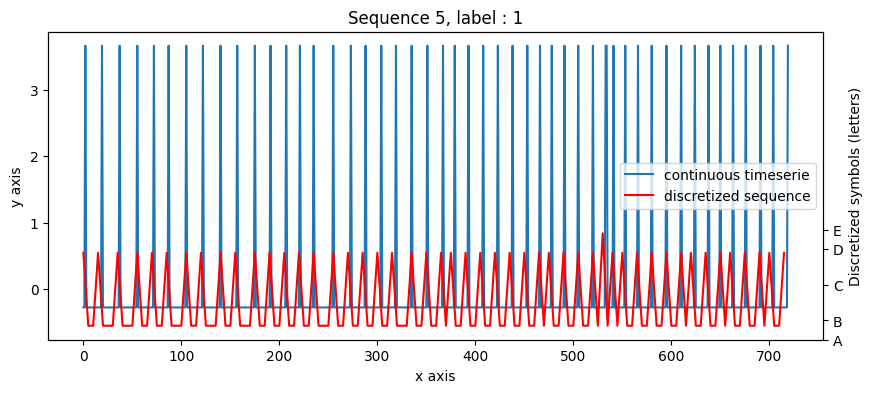

In [3]:
saxer.display_sequence(5)

Now let us parse the dataset into a baseline set, an anomalous set, and let's create baseline validation set to see the anomaly score assigned to baseline data.

In [ ]:
baseline = dataset.loc[dataset["label"] == 1]
anomaly = dataset.loc[dataset["label"] == 2]

print(f"length category 1 : {len(anomaly)} : length category 2 : {len(baseline)}")

baseline_train = baseline.sample(frac=0.8, random_state=42)
baseline_validation = baseline.drop(baseline_train.index)

anomaly_sample = anomaly.sample(frac=0.8, random_state=42)

baseline_validation = baseline_validation["sequence"].values
baseline_train = baseline_train["sequence"].values
anomaly_sample = anomaly_sample["sequence"].values

length category 1 : 125 : length category 2 : 125


# I) Kernel Based Techniques :

In [ ]:
from KernelBased import KnearestKernel, MedoidsKernel, nLCS

knearest_dad = KnearestKernel(nLCS)
knearest_dad.train(baseline_train)

train_proba = knearest_dad.predict_proba(baseline_test)
test_proba = knearest_dad.predict_proba(anomaly_sample)

Now let us plot the distribution of the train score and the test score to see if anomalies can be infered. 

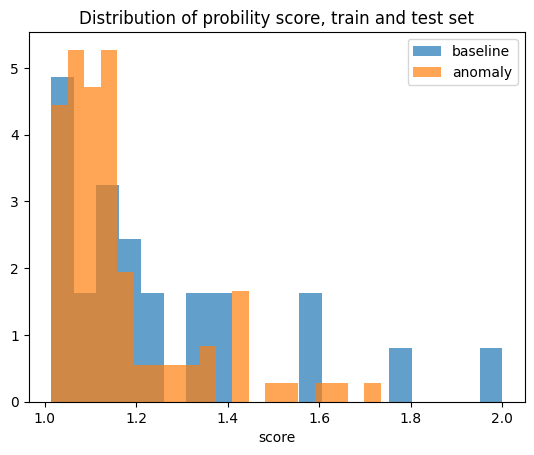

In [12]:
fig, ax = plt.subplots()
ax.hist(train_proba, bins=20, label="baseline", alpha=0.7, density=True)
ax.hist(test_proba, bins=20,  label="anomaly", alpha=0.7, density=True)
ax.set_title('Distribution of probility score, train and test set')
ax.set_xlabel("score")
ax.legend()

In [13]:
kmedoids_dad = MedoidsKernel(nLCS)
kmedoids_dad.train(baseline_train)

train_proba = kmedoids_dad.predict_proba(baseline_test)
test_proba = kmedoids_dad.predict_proba(anomaly_sample)

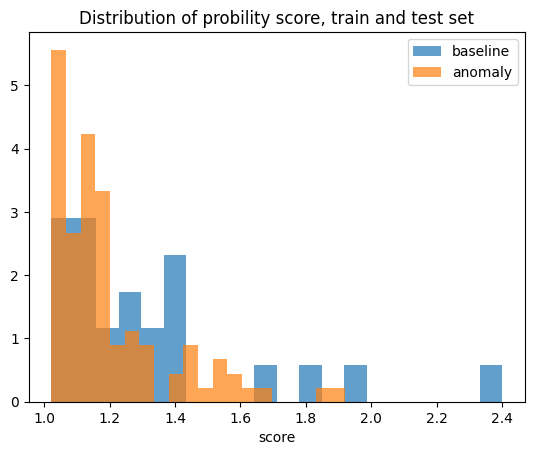

In [14]:
fig, ax = plt.subplots()
ax.hist(train_proba, bins=20, label="baseline", alpha=0.7, density=True)
ax.hist(test_proba, bins=20,  label="anomaly", alpha=0.7, density=True)
ax.set_title('Distribution of probility score, train and test set')
ax.set_xlabel("score")
ax.legend()

There is no significant difference between the distribution of probability score for the anomalous set or the baseline set, therefore the kernel based method can not work on this dataset. This is especially clear since the distribution of the continuous sequences are also very similar to one another.